In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
datamice= pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/modeling/data/final_mice.csv")
datamedian= pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/modeling/data/final_median.csv")
dataknn= pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/modeling/data/final_knn.csv")

## Mice

In [4]:
datamice.shape

(6822, 32)

In [5]:
datamice.head()

,Attr2,Attr3,Attr4,Attr5,Attr6,Attr9,Attr10,Attr13,Attr19,Attr21,...,Attr59,Attr61,Attr64,Attr65,Attr66,Attr67,Attr68,Attr69,Attr70,class
0,-0.564475,-0.173956,-0.124649,0.012790,-0.014341,-0.451866,0.321246,-0.004382,-0.518534,-0.021175,...,-0.018746,-0.711244,-1.053473,-0.126576,0.402104,-0.058312,0.017091,-0.205098,0,0
1,-1.698654,1.841882,1.129210,0.011900,-0.221494,-0.386067,0.779132,0.060436,-0.181104,0.029315,...,-0.047671,2.085748,2.083580,-1.260417,0.206697,0.197628,-0.035273,16.246606,1,0
2,-0.014504,0.018601,-0.329322,0.012822,-0.009368,0.074404,0.103175,-0.030770,-1.019254,-0.140062,...,-0.035084,-1.074730,-0.268523,-0.367238,0.838218,-0.364028,0.004898,-0.035524,0,0
3,-0.995975,1.018673,0.878251,0.028528,0.037467,-0.376297,0.510253,0.006106,2.226964,-0.043613,...,-0.046055,0.449361,0.294264,0.090047,-1.226899,0.011336,-0.031391,-0.170398,0,0
4,-0.035359,-0.373743,-0.607667,-0.001269,-0.009368,0.464720,0.113260,0.002117,0.293229,-0.023797,...,-0.046561,-0.076763,-0.291498,-0.010448,-0.354641,0.064521,0.561108,-0.125715,0,0


#### train & test split

In [4]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(datamice.iloc[:, 0:(datamice.shape[1]-1)], datamice['class'], test_size=0.3, random_state= 730)

In [54]:
stf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 730)

### LDA

In [55]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [56]:
score = cross_val_score(lda, X_train, y_train, cv = stf, scoring = 'f1_micro')

In [57]:
score.mean()

0.9553950334640315

In [58]:
score = cross_val_score(lda, X_train, y_train, scoring = "roc_auc", cv = stf)

In [59]:
score.mean()

0.7610154525386312

In [60]:
lda.fit(X_train,y_train)
pred_y = lda.predict(X_test)

In [61]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.951
ROC AUC : 0.590


### QDA

In [62]:
qda = QuadraticDiscriminantAnalysis().fit(X_train,y_train)

In [63]:
score = cross_val_score(qda, X_train, y_train, cv = stf, scoring = 'f1_micro')

In [64]:
score.mean()

0.16083874985745988

In [65]:
score = cross_val_score(qda, X_train, y_train, scoring = "roc_auc", cv = stf)

In [66]:
score.mean()

0.6998866813833701

In [67]:
qda.fit(X_train,y_train)
pred_y = qda.predict(X_test)

In [68]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.166
ROC AUC : 0.538


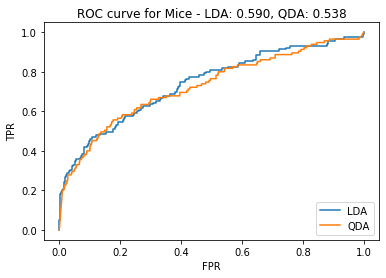

In [69]:
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(y_test, qda.predict_proba(X_test)[:,1])        
plt.clf()
plt.plot(false_positive_rate1, true_positive_rate1, label = "LDA")
plt.plot(false_positive_rate2, true_positive_rate2, label = "QDA")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC curve for Mice - LDA: 0.590, QDA: 0.538")
plt.legend(loc = 4)
plt.show()

## KNN

In [54]:
dataknn.shape

(6805, 39)

In [55]:
dataknn.head()

,Attr3,Attr4,Attr5,Attr6,Attr9,Attr10,Attr12,Attr15,Attr18,Attr19,...,Attr57,Attr58,Attr59,Attr61,Attr63,Attr64,Attr68,Attr69,Attr70,class
0,-0.177767,-0.123483,0.009524,0.009448,-0.456467,0.301698,-0.031183,0.056725,-0.370348,-0.518652,...,-0.056065,-0.030072,-0.018519,-0.714359,-0.045731,-1.073841,0.017298,-0.286284,0,0
1,1.861965,1.097655,0.008598,-0.411517,-0.390186,0.725650,19.373965,-0.041950,3.297537,-0.180426,...,0.214041,-0.447314,-0.047413,2.069638,5.610952,-0.137180,-0.034991,0.485499,1,0
2,0.017073,-0.330491,0.009558,0.019555,0.073659,0.099788,-0.035084,-0.049363,-2.347134,-1.020554,...,-0.378704,0.206205,-0.034839,-1.076156,-0.051393,-0.271095,0.005122,-0.138982,0,0
3,1.028999,0.890857,0.025911,0.114729,-0.380344,0.476698,-0.026925,-0.037176,0.422903,2.233324,...,0.017436,-0.063601,-0.045798,0.440854,-0.048111,0.304451,-0.031114,-0.229793,0,0
4,-0.379922,-0.612011,-0.005114,0.019555,0.466834,0.109125,-0.029113,-0.026674,0.440759,0.295026,...,0.073563,-0.109727,-0.046303,-0.082826,-0.050858,-0.294590,0.560525,-0.157048,0,0


### train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataknn.iloc[:, 0:(dataknn.shape[1]-1)], dataknn['class'], test_size=0.3, random_state= 730)

### LDA

In [14]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [15]:
score = cross_val_score(lda, X_train, y_train, cv = stf, scoring = 'f1_micro')

In [16]:
score.mean()

0.9536013776579815

In [17]:
score = cross_val_score(lda, X_train, y_train, scoring = "roc_auc", cv = stf)

In [18]:
score.mean()

0.7679047683286567

In [19]:
lda.fit(X_train,y_train)
pred_y = lda.predict(X_test)

In [20]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.953
ROC AUC : 0.625


### QDA

In [22]:
qda = QuadraticDiscriminantAnalysis().fit(X_train,y_train)

In [23]:
score = cross_val_score(qda, X_train, y_train, cv = stf, scoring = 'f1_micro')

In [24]:
score.mean()

0.16733215298698098

In [25]:
score = cross_val_score(qda, X_train, y_train, scoring = "roc_auc", cv = stf)

In [26]:
score.mean()

0.6482365098208503

In [27]:
qda.fit(X_train,y_train)
pred_y = qda.predict(X_test)

In [28]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.163
ROC AUC : 0.519


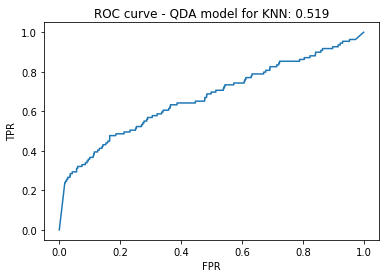

In [33]:
qda = qda.fit(X_train, y_train)
y_test_predicted = qda.predict(X_test)
        
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, qda.predict_proba(X_test)[:,1])
        
plt.clf()
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC curve - QDA model for KNN: 0.519")
plt.show()

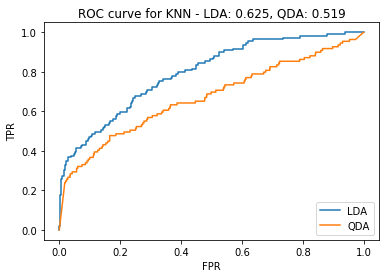

In [40]:

y_test_predicted_ = lda.predict(X_test)
        
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(y_test, qda.predict_proba(X_test)[:,1])        
plt.clf()
plt.plot(false_positive_rate1, true_positive_rate1, label = "LDA")
plt.plot(false_positive_rate2, true_positive_rate2, label = "QDA")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC curve for KNN - LDA: 0.625, QDA: 0.519")
plt.legend(loc = 4)
plt.show()

## Median

In [73]:
datamedian.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr9,Attr10,Attr12,Attr13,...,Attr59,Attr61,Attr64,Attr65,Attr66,Attr67,Attr68,Attr69,Attr70,class
0,-0.305882,-0.567830,-0.191750,-0.118907,0.009449,-0.004600,-0.452027,0.328989,-0.022936,-0.015081,...,-0.018722,-0.708407,-1.073419,-0.125311,0.413225,-0.048981,0.005588,-0.294502,0,0
1,2.511211,-1.708722,1.979607,-0.257969,0.008522,-0.287835,-0.386111,0.799984,14.966639,0.046834,...,-0.047639,2.069378,-0.216780,-0.075797,0.209906,0.128412,-0.034505,-0.144385,1,0
2,-2.072361,-0.014605,0.015663,-0.327737,0.009483,0.002200,0.075177,0.104675,-0.025949,-0.040287,...,-0.035054,-1.069397,-0.247814,-0.368230,0.866998,-0.260872,-0.003748,-0.144385,0,0
3,0.305626,-1.001884,1.092889,0.904366,0.025844,0.066235,-0.376323,0.523407,-0.019647,-0.005064,...,-0.046023,0.444228,0.344121,0.093344,-1.281735,-0.000707,-0.031532,-0.229892,0,0
4,0.445815,-0.035583,-0.406950,-0.611737,-0.005197,0.002200,0.466185,0.115048,-0.021337,-0.008874,...,-0.046528,-0.078284,-0.271979,-0.008094,-0.374159,0.036156,0.422113,-0.146693,0,0


In [72]:
datamedian.shape

(6818, 41)

### train test split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(datamedian.iloc[:, 0:(datamedian.shape[1]-1)], datamedian['class'], test_size=0.3, random_state= 730)

### LDA

In [71]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [72]:
score = cross_val_score(lda, X_train, y_train, cv = stf, scoring = 'f1_micro')

In [73]:
score.mean()

0.9528499250019736

In [74]:
score = cross_val_score(lda, X_train, y_train, scoring = "roc_auc", cv = stf)

In [75]:
score.mean()

0.7612390678606952

In [76]:
lda.fit(X_train,y_train)
pred_y = lda.predict(X_test)

In [77]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.951
ROC AUC : 0.597


### QDA

In [78]:
qda = QuadraticDiscriminantAnalysis().fit(X_train,y_train)

In [79]:
score = cross_val_score(qda, X_train, y_train, cv = stf, scoring = 'f1_micro')

In [80]:
score.mean()

0.15506872626158957

In [81]:
score = cross_val_score(qda, X_train, y_train, scoring = "roc_auc", cv = stf)

In [82]:
score.mean()

0.6481013570931551

In [83]:
qda.fit(X_train,y_train)
pred_y = qda.predict(X_test)

In [84]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.146
ROC AUC : 0.523


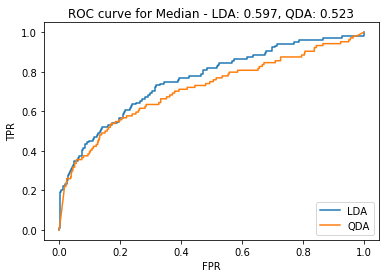

In [85]:
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(y_test, qda.predict_proba(X_test)[:,1])        
plt.clf()
plt.plot(false_positive_rate1, true_positive_rate1, label = "LDA")
plt.plot(false_positive_rate2, true_positive_rate2, label = "QDA")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC curve for Median - LDA: 0.597, QDA: 0.523")
plt.legend(loc = 4)
plt.show()

#### ROC curve

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

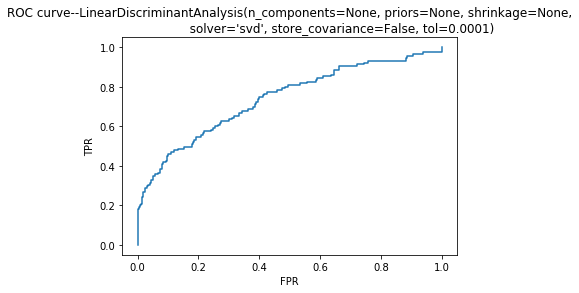

In [12]:
lda = lda.fit(X_train, y_train)
y2_test_predicted = lda.predict(X_test)
        
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
        
plt.clf()
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve-' + '-' + str(lda))
plt.show()